In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import matplotlib.image as mpimg
from funcs import *
%matplotlib inline 

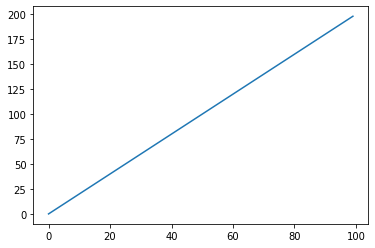

In [2]:
x = range(100)

fig, ax = plt.subplots()
ax.plot(x,[i*2 for i in x])
plt.show()

Basic Plotting

There is 10 basic plots, they follow with their formatting.

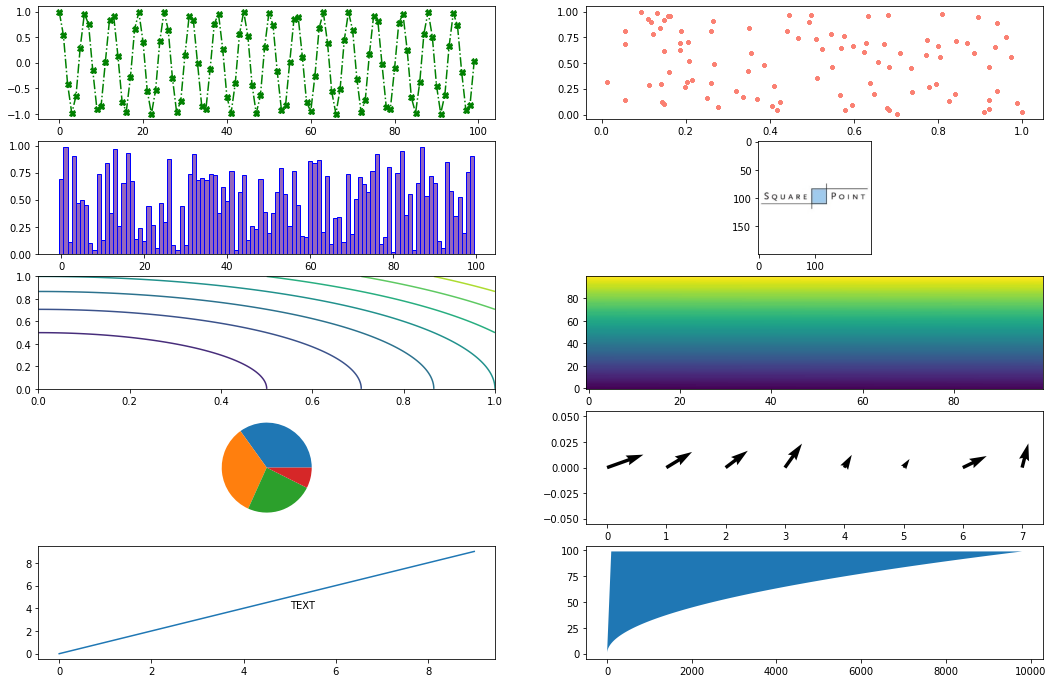

In [3]:
#Basic Plotting

rows = 5
columns = 2
fmt = 'b1--'

#Basic plot parameters
x_plot_range = range(100)
y_plot = np.cos(x_plot_range)
fmt_plot = 'gX-.'

#Scatter plot parameters
x_range = np.random.rand(100)
y_range = np.random.rand(100)
size = 10
color = 'salmon'
marker = 'P'

#Bar graph parameters
x_bar = range(100)
heights_bar = np.random.rand(100)
width = 1
color_bar = 'C4'
edgecolor_bar = 'b'

#imshow() Parameters
imshow_matrix= mpimg.imread('squarepoint.png')

#contour Parameters
x_contour = np.linspace(0,1,100)
y_contour = np.linspace(0,1,100)
xv_contour, yv_contour = np.meshgrid(x_contour,y_contour)
z_contour = xv_contour**2 + yv_contour**2

#pcolormesh parameters
x_pcolormesh = range(100)
y_pcolormesh = range(100)
z_pcolormesh = pcm_gen(100)
shade='auto'

#quiver parameters
x_quiver = np.random.rand((8))
y_quiver = np.random.rand((8))

#text params
x_text = 5
y_text = 4
text = 'TEXT'

#fill params
x_fill = range(100)
y1_fill = [x**2 for x in x_fill]
y2_fill = [x for x in x_fill]

#pie Params
pieParam = [np.random.randint(100) for i in range(4)]

fig, ax = plt.subplots(rows,columns,figsize=(18,12))
ax[0][0].plot(x_plot_range, y_plot, fmt_plot)
ax[0][1].scatter(x_range,y_range,size,color,marker)
ax[1][0].bar(x_bar,heights_bar,width, color=color_bar, edgecolor=edgecolor_bar)
ax[1][1].imshow(imshow_matrix)
ax[2][0].contour(xv_contour, yv_contour ,z_contour)
ax[2][1].pcolormesh(x_pcolormesh,y_pcolormesh,z_pcolormesh, shading=shade)
ax[3][0].pie(pieParam)
ax[3][1].quiver(x_quiver, y_quiver)
ax[4][0].text(x_text,y_text, text)
ax[4][0].plot(range(10),range(10))
ax[4][1].fill_betweenx(x_fill, y1_fill, y2_fill)
plt.show()

Futher Plotting

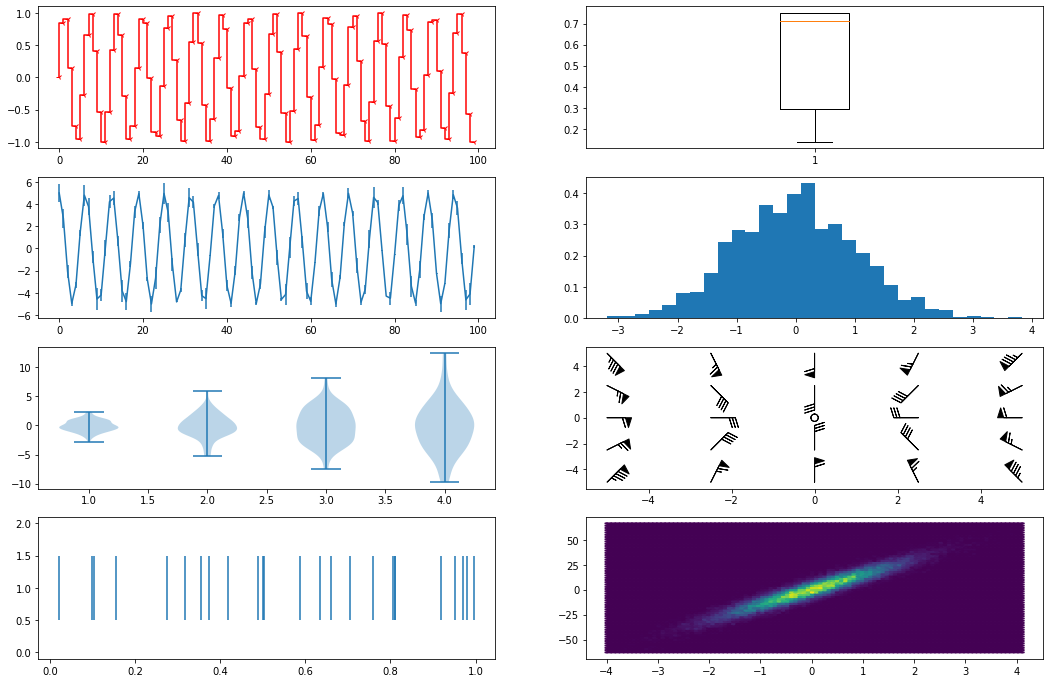

In [4]:
#Set rows and columns

from matplotlib.pyplot import eventplot


rows = 4
columns = 2
fmt = 'r3-'

#Step Parameters
x_step = range(100)
y_step = np.sin(x_step)

#Boxplot Parameters
x_boxplot = [sorted(np.random.rand(5))]

#Errorbar parameters
x_err = range(100)
y_err = 5*np.cos(x_err)
yerr = np.random.rand(100)

#hist Parameters
mu = 0
sigma = 1
num_points = 1000
bins = 30
x_hist = np.random.normal(mu, sigma, num_points)

#Violinplot Parameters
x_vioplot = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]

#barbs Parameters
x_seed = np.linspace(-5, 5, 5)
X_barbs, Y_barbs = np.meshgrid(x_seed, x_seed)
U_barbs, V_barbs = 12 * X_barbs, 12 * Y_barbs

#eventplot param
eventplot_param = np.random.rand(25)

#hexbin params
x_hexbin = np.random.normal(size=50000)
y_hexbin = (x_hexbin * 3 + np.random.normal(size=50000)) * 5

fig, ax = plt.subplots(rows, columns, figsize=(18,12))
ax[0][0].step(x_step, y_step, fmt)
ax[0][1].boxplot(x_boxplot)
ax[1][0].errorbar(x_err,y_err,yerr)
ax[1][1].hist(x_hist, bins, density=True)
ax[2][0].violinplot(x_vioplot)
ax[2][1].barbs(X_barbs, Y_barbs, U_barbs, V_barbs)
ax[3][0].eventplot(eventplot_param)
ax[3][1].hexbin(x_hexbin, y_hexbin)
plt.show()

Seaborn plots, a more powerful data visualization module.

In [5]:
import seaborn as sns
import pandas as pd

In [6]:
data = sns.load_dataset('flights')
df_flights = pd.DataFrame(data)
df_flights.tail(5)

,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


<AxesSubplot:xlabel='None-month', ylabel='year'>

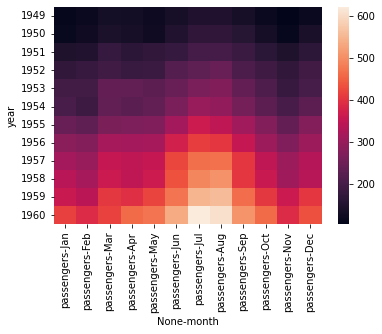

In [7]:
sns.heatmap(df_flights.pivot('year','month'))

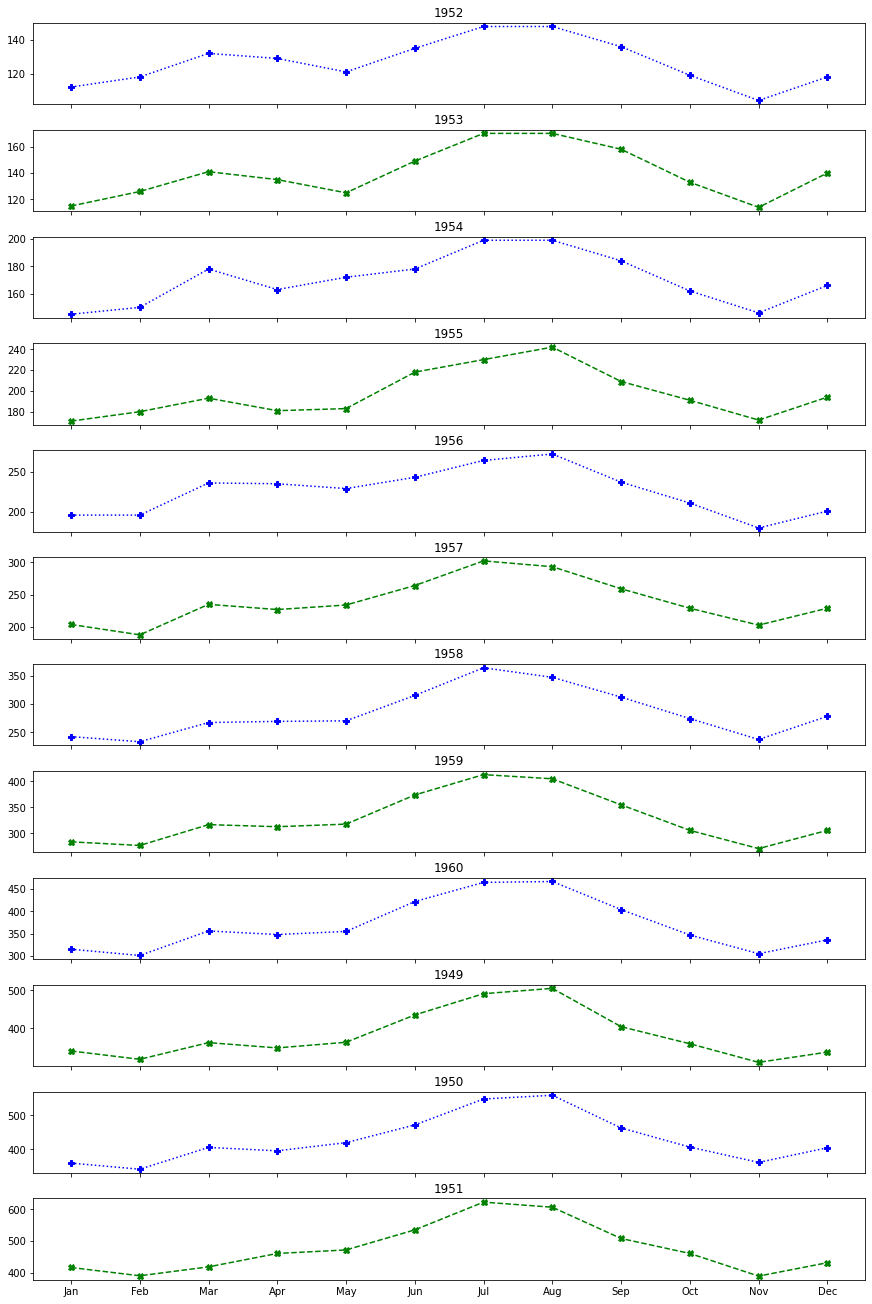

In [8]:
fig, ax = plt.subplots(12, sharex=True, figsize=(12,18), constrained_layout=True)
fmt = ['bP:','gX--']
for year in range(12):
    ax[year].plot(df_flights.iloc[0:12]['month'], df_flights.iloc[12*(year):12*(year+1)]['passengers'], fmt[year%2])
    ax[year].set_title(list(set(df_flights['year']))[year])
plt.show()

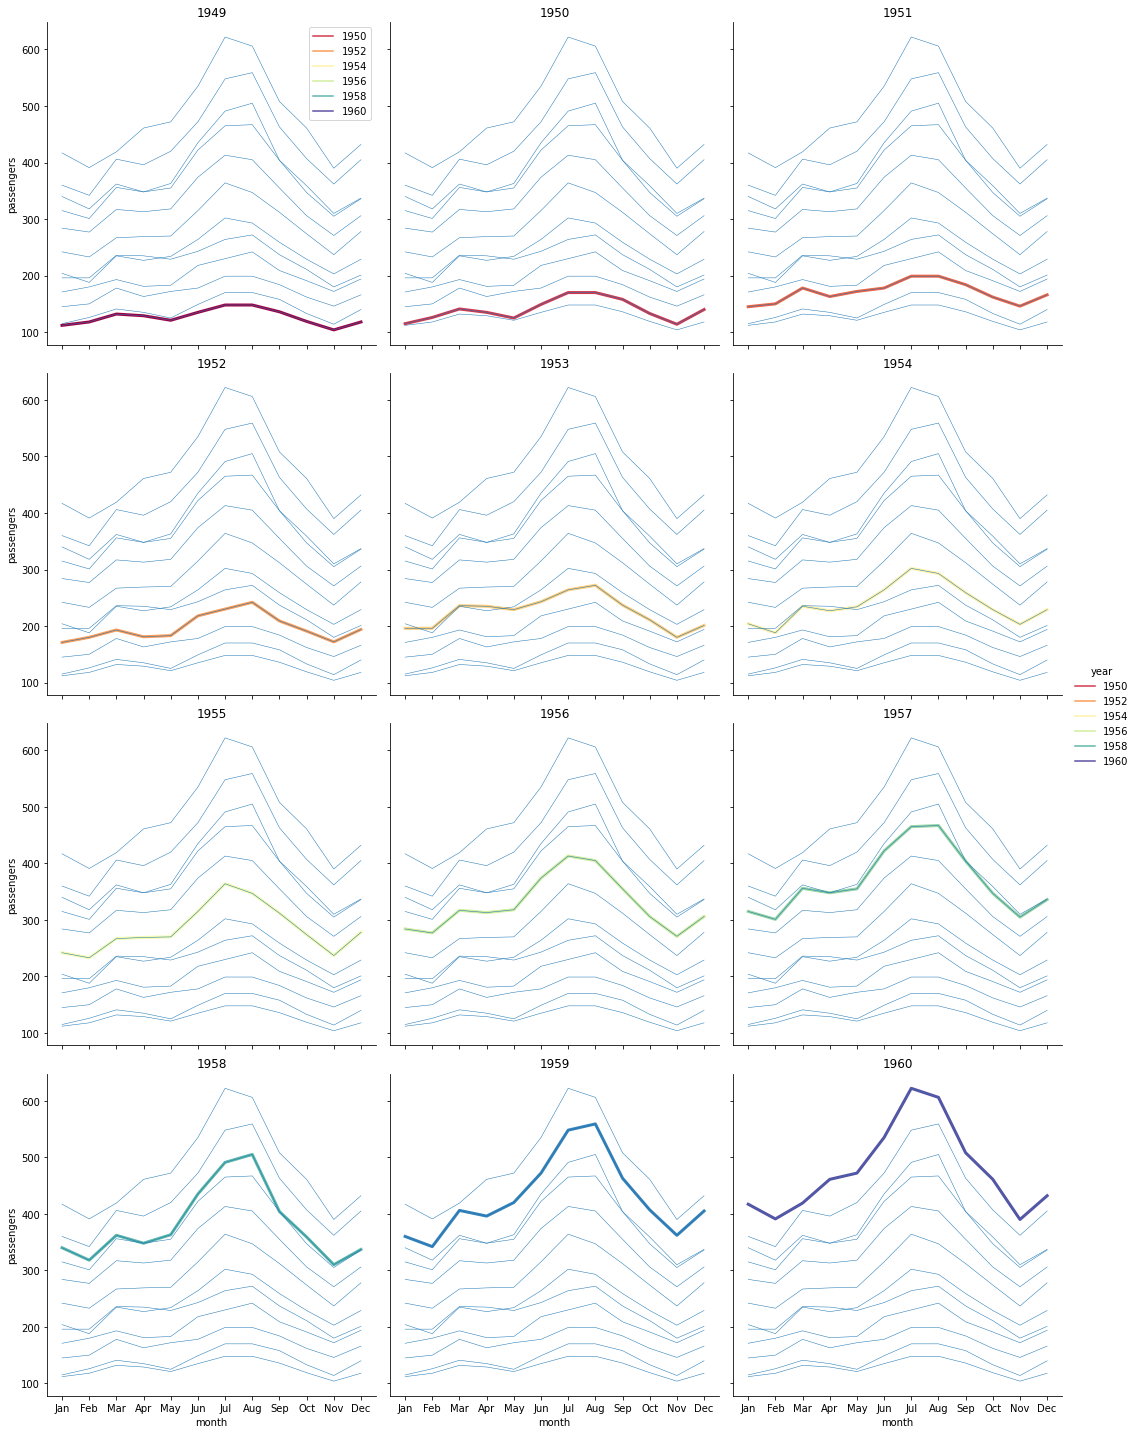

In [9]:
plots = sns.relplot(data=df_flights, x='month',y='passengers',col='year',hue='year', col_wrap=3, kind='line', linewidth=3, palette='Spectral');
for year, ax in plots.axes_dict.items():
    sns.lineplot(data=df_flights, x='month', y='passengers', units='year', estimator=None, ax=ax, linewidth=0.5);
    ax.set_title(year)